# Большое практическое задание 1
# Классификация изображений цифр метрическими методами

## курс "Машинное обучение 1", программа AIMasters, 2022

## Студент: Грачев Денис Вадимович

## Введение

Данное задание направлено на ознакомление с метрическими алгоритмами классификации, а также методами работы с изображениями. В задании вам будет необходимо:

1. Написать на языке Python собственные реализации метода ближайших соседей и кросс-валидации. Реализации должны соответствовать спецификации, описанной в прилагающихся модулях.     
    Частично проверить правильность выполнения своих реализаций можно с помощью системы ejudge в соответствующем соревновании.
    **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения.


2. Провести описанные ниже эксперименты с датасетом изображений цифр MNIST, описать полученые результаты и ответить на предложенные вопросы.


3. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно.

    **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать:
    `File -> Download as -> HTML (.html).`
    Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de).
Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями.

    Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.

### Некоторые полезные советы

1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль `knn`, можно добавить ячейку с таким содержимым:
     
```
    %load_ext autoreload
    
    %autoreload 2
```
   
2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `knn` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:

```
    tree
    ---knn
    ------__init__.py
    ------classification.py
    ------distances.py
    ------model_selection.py
    ------nearest_neighbors.py
    ---tests
    ------__init__.py
    ------test_classification.py
    ------test_distances.py
    ------test_model_selection.py
    ------test_nearest_neigbours.py
    experiments.ipynb
```

## Реализация алгоритмов (10 баллов)

Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить
все выданные тесты. Задание, не проходящее все выданные тесты, приравнивается к невыполненному. При
написании **необходимо пользоваться** стандартными средствами языка Python и библиотекой numpy. Библиотеками scipy и scikit-learn пользоваться **запрещено**, если это не обговорено отдельно в пункте задания. Для
экспериментов в бонусной части разрешается пользоваться любыми открытыми библиотеками, реализующими
алгоритмы обработки изображений.

Среди предоставленных файлов должны быть следующие модули и функции в них

1. Модуль `knn.distances` с реализацией функции для вычисления расстояния:
    1. `euclidean_distance(X, Y)` — реализация евклидова расстояния с заданными свойствами;
    2. `cosine_distance(X, Y)` — реализация косинусного расстояния с заданными свойствами;


2. Модуль `knn.nearest_neighbors`, содержащий собственную реализацию поиска ближайших соседей.
    
    Класс `NearestNeighborsFinder` с методами:
      1. `__init__(self, n_neighbors, metric="euclidean")` — конструктор (инициализатор) класса;
      2. `fit(self, X, y=None)` — обучение алгоритма;
      3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей.


3. Модуль `knn.classification`, содержащий собственную реализацию классификатора на основе метода ближайших соседей.

    Класс `KNNClassifier` с методами:
    
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’)` — конструктор (инициализатор) класса;
    2. `fit(self, X, y=None)` — обучение алгоритма;
    3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей;
    4. `predict(self, X)` — редсказание на новых данных;
    5. `_predict_precomputed(self, indices, distances)` — вспомогательный метод.
    
   Класс `BatchedKNNClassifier`, полезный для работы с большими выборками, с методами:
   
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’, batch_size=None)` — конструктор (инициализатор) класса
    2. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей, разбитый на несколько итераций по батчам
    3. `set_batch_size(self, batch_size)` — метод для выставления нового значения размера батча


4. Модуль `knn.model_selection` с реализациями функций для применения кросс-валидации:

    1. `knn_cross_val_score(X, y, k_list, scoring, cv=None, **kwargs)` — функция для измерения качества на кросс-валидации.

Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые unit-тесты, которые находятся рядом с модулем `knn` в директории `tests` Чтобы запустить тесты в консоли требуется выполнить одну из команд:


```
$ python -m unittest                            # запуск всех тестов
$ python -m unittest tests/test_distances.py    # запуск конкретных тестов
```

## Эксперименты (15 баллов)

Здесь вы можете заимпортировать всё, что вам потребуется для экспериментов:

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from knn.distances import euclidean_distance, cosine_distance 
from knn.classification import BatchedKNNClassifier
from knn.model_selection import knn_cross_val_score
from knn.nearest_neighbors import NearestNeighborsFinder

### 1. Загрузка даннных

Эксперименты этого задания необходимо проводить на датасете MNIST. Загрузить датасет можно при помощи функции `sklearn.datasets.fetch_openml("mnist_784")` или скачать вручную с сайта
http://yann.lecun.com/exdb/mnist/. Датасет необходимо разбить на обучающую выборку (первые 60 тыс.
объектов) и тестовую выборку (10 тыс. последних объектов).

In [3]:
from sklearn import datasets
import pandas as pd
import seaborn as sns

In [4]:
data = datasets.fetch_openml("mnist_784")
df = pd.DataFrame(
    data=np.c_[data['data'], data['target']],
    columns=data['feature_names'] + ['target']
)

df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [5]:
train_X = df.iloc[:60000, :-1].values.astype(float)
train_y = df.iloc[:60000, -1].values

test_X = df.iloc[-10000:, :-1].values.astype(float)
test_y = df.iloc[-10000:, -1].values

In [6]:
np.random.seed(123)
sizes = [5, 10, 100]

size_columns = {size: np.random.choice(np.arange(train_X.shape[1]), size, replace=False) for size in sizes}    
times = {}

for size, columns in size_columns.items():
    print(size, len(columns))
    model = BatchedKNNClassifier(n_neighbors=5, batch_size=100)
    model.fit(train_X[:, columns], train_y)
    result = %timeit -n 1 -r 1 -o model.predict(test_X[:, columns])

    times[size] = result.timings[0]


5 5
9.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10 10
12.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
100 100
14.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Приведите график / таблицу с результатами вашего эксперимента

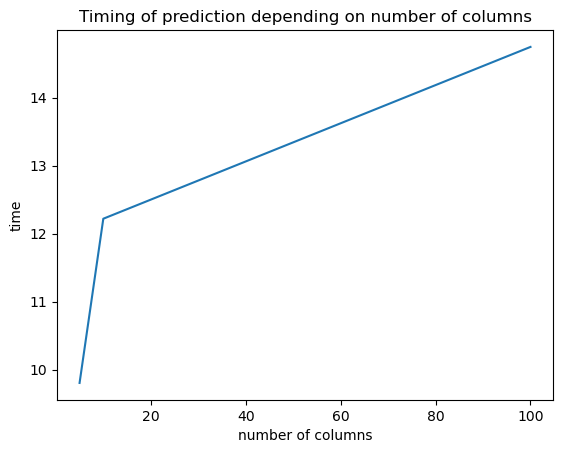

In [7]:
plt.title('Timing of prediction depending on number of columns')
plt.xlabel('number of columns')
plt.ylabel('time')
plt.plot(times.keys(), times.values())
plt.show()

Результаты довольно странные  
Попробуем запустить в обратном порядке  
может быть дело в том что ноут разгоняется при активной работе или что-то попадает в кэш.  

UPD. 
когда я перешел от df сразу к numpy картинка пропала, но для 20 колонок изначально было быстрее чем для 5

In [8]:
np.random.seed(123)
sizes = [100, 10, 5]

size_columns = {size: np.random.choice(np.arange(train_X.shape[1]), size, replace=False) for size in sizes}    
times = {}

for size, columns in size_columns.items():
    print(size, len(columns))
    model = BatchedKNNClassifier(n_neighbors=5, batch_size=100)
    model.fit(train_X[:, columns], train_y)
    result = %timeit -n 1 -r 1 -o model.predict(test_X[:, columns])

    times[size] = result.timings[0]


100 100
14.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10 10
12.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
5 5
10.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


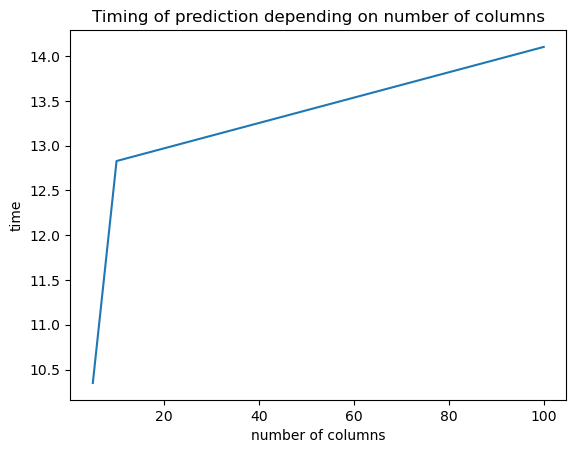

In [9]:
plt.title('Timing of prediction depending on number of columns')
plt.xlabel('number of columns')
plt.ylabel('time')
plt.plot(times.keys(), times.values())
plt.show()

Судя по всему компьютер ускоряется со временем работы  
но не точно что дело в этом

In [10]:
np.random.seed(123)
sizes = [100, 50, 20, 10, 5]

size_columns = {size: np.random.choice(np.arange(train_X.shape[1]), size, replace=False) for size in sizes}    
times = []

for size, columns in size_columns.items():
    for algorithm in ['my_own', 'brute', 'ball_tree', 'kd_tree']:
        print(size, algorithm)
        model = BatchedKNNClassifier(n_neighbors=5, batch_size=100, algorithm=algorithm)
        model.fit(train_X[:, columns], train_y)
        result = %timeit -n 1 -r 1 -o model.predict(test_X[:, columns])

        times.append([result.timings[0], size, algorithm])

times = pd.DataFrame(times, columns=['time', 'size', 'algorithm'])

100 my_own
14.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
100 brute
13.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
100 ball_tree
1min 33s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
100 kd_tree
1min 32s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50 my_own
12.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50 brute
12.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50 ball_tree
1min 1s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
50 kd_tree
26.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
20 my_own
12.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
20 brute
12.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
20 ball_tree
18.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
20 kd_tree
8.64 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10 my_own
11.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
10 brute
11.4 s ± 0 

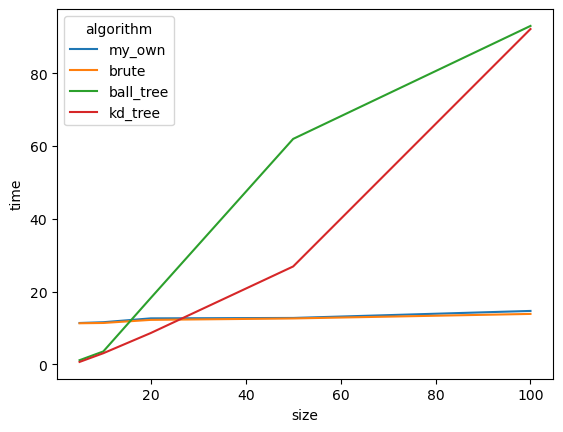

In [11]:
sns.lineplot(data=times, x='size', y='time', hue='algorithm')
plt.show()

#### Ответьте на следующие вопросы

1. Какой алгоритм сработал быстрее всего для каждого из размера подвыборок? Ожидали ли вы такие результаты до проведения эксперимента?

   При маленьких `k` алгоритмы `kd_tree` и `ball_tree` чуть обогнали `my_own` и `brute`, однако сильно проиграли им при больших `k` 

2. Приведите теоретическую сложность каждого из алгоритмов поиска. Согласуется ли время работы алгоритмов на практике с их теоретической вычислительной сложностью? Как вы думаете, почему?


3. Какой алгоритм исходя из результатов эксперимента следует использовать в дальнейшем? Выберите алгоритм поиска соседей, который вы будете использовать во всех экспериментах ниже. 

Мне кажется нам необходимо будет большое количество колонок, соответсвенно можно использовать `my_own`


### 3. Исследование зависимости точности алгоритма на кросс-валидации (4 балла)


Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) алгоритма k ближайших соседей в зависимости от следующих факторов:
* количество соседей k от 1 до 10
* используется евклидова или косинусная метрика

In [12]:
from sklearn.model_selection import KFold

In [13]:
k_list = list(range(1, 11))
# X = df.iloc[:, :-1].values.astype(float)
# y = df.iloc[:, -1].values

In [14]:
accuracies_euclid = knn_cross_val_score(
    X=train_X,
    y=train_y, 
    k_list=k_list, 
    scoring='accuracy',
    cv=KFold(n_splits=3),
    batch_size=1000,
    metric='euclidean'
)

In [15]:
accuracies_cosine = knn_cross_val_score(
    X=train_X,
    y=train_y, 
    k_list=k_list, 
    scoring='accuracy',
    cv=KFold(n_splits=3),
    batch_size=1000,
    metric='cosine'
)

#### Нарисуйте график зависимости точности от количества соседей по каждой метрике

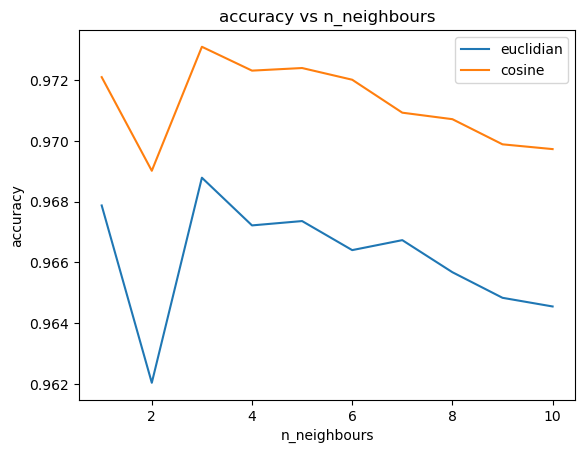

In [16]:
plt.title('accuracy vs n_neighbours')
plt.plot(k_list, [np.mean(accuracies_euclid[k]) for k in k_list], label='euclidian')
plt.plot(k_list, [np.mean(accuracies_cosine[k]) for k in k_list], label='cosine')

plt.xlabel('n_neighbours')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор (например, если у вас несколько наборов параметров с высоким качеством, обоснуйте как вы выберите среди этих наборов один).

    * Косинусное расстояние лучше справляется чем евклидово для всех `k`.  
    Думаю это связано с тем что разная интенсивность картинок приводит к большему евклидову расстоянию между векторами, хотя по логике не влияет на определение цифры.  
    Наилучшим значением `k` для обоих расстояний является 3.  
    Поэтому наилучшей из протестированных моделей является `k=3, metric='cosine'` 


2. Какая метрика лучше себя показала в экспериментах? Можете ли вы объяснить, почему?

    * Как упомянулось ранее, `cosine` лучше справилась чем `euclidean`,   
    предположительно потому что евклидово расстояние будет обращать внимание на интесивность картинки,  
    а косинусное нет.
    
3. Есть ли на графике зависимости точности от количество соседей "выбросы", резкие падения/повышения качества для одного значения k по сравнению с соседними? Если да, предположите причину появления этих выбросов.

    * Почему то есть резкое падение для `k=2` для обоих метрик.  
    Так как мы берем моду из 2 чисел, то по сути это случайный класс из двух ближайших соседей.  
    Для 1 это хотя бы либо ближайшая возможная картинка либо большинство голосов.  
    По всей видимости 2 невзвешенных соседа почти всегда плохая идея.

### 3. Исследование зависимости точности взвешенного алгоритма на кросс-валидации (4 балла)

По результатам предыдущего эксперимента выберите метрику, которую вы будете использовать в этом эксперименте.

Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) взвешенного алгоритма k ближайших соседей в зависимости от количество соседей k (от 1 до 10).

Голос объекта положите равным `1 / (distance + eps)`, где `eps` = `1e-5`.

In [17]:
accuracies_euclid = knn_cross_val_score(
    X=train_X,
    y=train_y, 
    k_list=k_list, 
    scoring='accuracy',
    cv=KFold(n_splits=3),
    batch_size=1000,
    metric='euclidean',
    weights='distance'
)

accuracies_cosine = knn_cross_val_score(
    X=train_X,
    y=train_y, 
    k_list=k_list, 
    scoring='accuracy',
    cv=KFold(n_splits=3),
    batch_size=1000,
    metric='cosine',
    weights='distance'
)

#### Нарисуйте график зависимости точности от количества соседей 

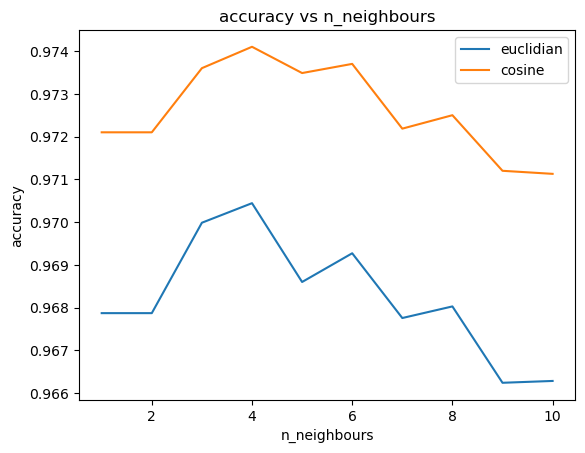

In [18]:
plt.title('accuracy vs n_neighbours')
plt.plot(k_list, [np.mean(accuracies_euclid[k]) for k in k_list], label='euclidian')
plt.plot(k_list, [np.mean(accuracies_cosine[k]) for k in k_list], label='cosine')

plt.xlabel('n_neighbours')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор.

   * Косинусное расстояние снова показало себя лучше в этой задаче по тем же причинам.  
   Пропала резкое падение для `k=2`, как раз таки потому что теперь предсказания более непрерывно зависят от соседей.  
   Наилуший параметр `k` чуть сместился и теперь равен 4.

2. Сравните результаты взвешенного алгоритма с невзвешенным. Объясните разницу/отсутствие разницы в результатах.

   * Не имеет резкого падения, так как теперь соседи взвешенные и ближний вносит больший вклад.  
   Максимум сместился вправо, что тоже логично. Так как более далекие соседи вносят меньший вклад,  
   то необходимо больше соседей, чтобы собрать необходимое число знаичмых соседей, 
   далекие и скорее неправильные соседи вносят меньший вклад и слабее влияют на ответ.

### 4. Применение алгоритма и интерпретация ошибок (3 балла)

1. Примените лучший алгоритм к исходной обучающей и тестовой выборке и посчитайте точность классификации. Сравните с точностью по кросс-валидации. Опишите ваши результаты.

In [19]:
from sklearn.metrics import accuracy_score

In [21]:
model = BatchedKNNClassifier(n_neighbors=4, metric='cosine', weights='distance', batch_size=1000)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
accuracy_score(y_pred, test_y), np.max(accuracies_cosine[4]), np.min(accuracies_cosine[4]), np.mean(accuracies_cosine[4])

(0.9752, 0.9754864146738664, 0.9729567565250932, 0.9740999801937931)

Выборка большая, модель дообучилась на фолдах примерно так же как и на всем датасете.  
Точность на тестовой выборке не сильно отличается от точности на фолдах.

2. Постройте и проанализируйте матрицу ошибок (confusion matrix), используйте функцию `sklearn.metrics.confusion_matrix`. Визуализируйте несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализируйте и укажите их общие черты.

In [ ]:
## your code here ##

*ваше описание здесь*

## Бонус 1. Размножение обучающей выборки (3 балла)

Размножьте обучающую выборку с помощью поворотов, смещений, применений гауссовского фильтра и морфологических операций. Разрешается использовать библиотеки для работы с изображениями. Подобрать по кросс-валидации с 3 фолдами параметры преобразований. Рассмотреть следующие параметры для преобразований и их комбинации:
1. Величина поворота: 5, 10, 15 (в каждую из двух сторон)
2. Величина смещения: 1, 2, 3 пикселя (по каждой из двух размерностей)
3. Дисперсия фильтра Гаусса: 0.5, 1, 1.5
4. Морфологические операции: эрозия, дилатация, открытие, закрытие с ядром 2

Проанализируйте, как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

**Замечание.** Не обязательно хранить все обучающие выборки в процессе эксперимента. Достаточно вычислить ближайших соседей по каждой из выборок, а затем выбрать из них ближайших соседей.

**Замечание по дизайну эксперимента**. В этой части вам предлагается самим выбрать дизайн эксперимента. Перебор всевоможных комбинаций преобразований может быть затруднительным, в то время как жадный выбор преобразований уже даст улучшение в качестве.

In [ ]:
## your code here ##

## Бонус 2. Размножение тестовой выборки (2 балла)

Реализуйте предложенный на семинаре алгоритм, основанный на преобразовании объектов тестовой выборки.
Проверьте то же самое множество параметров, что и в предыдущем пункте.

Проанализируйте как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

In [ ]:
## your code here ##

## Бонус 3. Сравнение подходов (1 балл)

Если вы реализовали оба подхода, сравните их между собой.

1. Какой подход даёт больший выигрыш в качестве и почему?

    *ваш ответ*
    

2. Есть ли какие-то преимущества у худшего по качеству подхода по сравнению с лучшим?

    *ваш ответ*